In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [47]:
df=pd.read_csv("D:\\pyt\\Assignment\\Feature_selection_MututalInfromation_InfoGain\\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
df.shape

(178, 14)

In [49]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [50]:
# train test split
X= df.drop("Type", axis=1)
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
#from sklearn.feature_selection import mutual_info_regression #  for Regression problem

from sklearn.feature_selection import mutual_info_classif     #  for classification problem
from sklearn.feature_selection import SelectKBest            # For selecting top best featues

In [52]:
# Selecting top 5 best features (k=5)
best_five  = SelectKBest(mutual_info_classif, k=5)
best_five.fit(X_train, y_train)
X_train.columns[best_five.get_support()]

Index(['Flavanoids', 'Color', 'Hue', 'Dilution', 'Proline'], dtype='object')

In [53]:
best_five.scores_

array([0.43292233, 0.27743843, 0.11165057, 0.23124663, 0.22072165,
       0.40698551, 0.67822297, 0.05867999, 0.38121958, 0.54020143,
       0.58676627, 0.52080197, 0.57624107])

In [54]:
scores = pd.Series(best_five.scores_)
scores.index = X_train.columns
scores.sort_values(ascending= False)

Flavanoids         0.678223
Hue                0.586766
Proline            0.576241
Color              0.540201
Dilution           0.520802
Alcohol            0.432922
Phenols            0.406986
Proanthocyanins    0.381220
Malic              0.277438
Alcalinity         0.231247
Magnesium          0.220722
Ash                0.111651
Nonflavanoids      0.058680
dtype: float64

<AxesSubplot:>

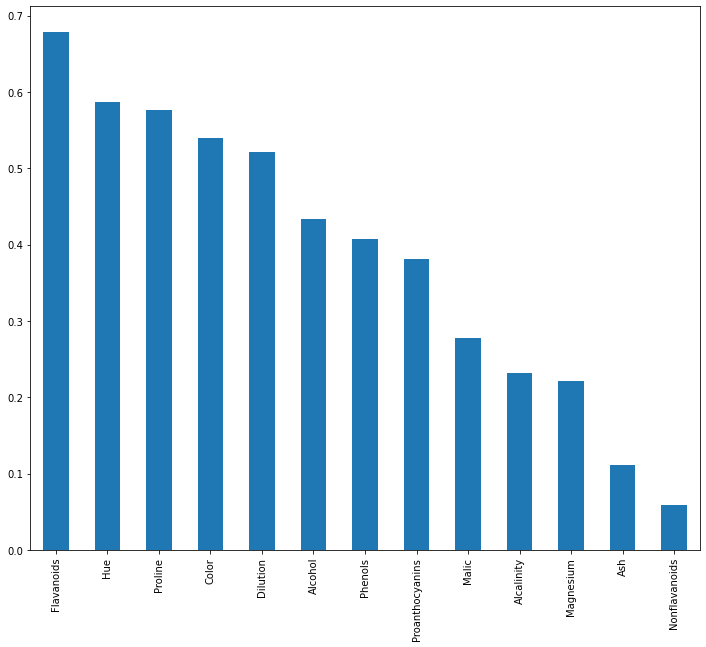

In [59]:
scores.sort_values(ascending= False).plot.bar(figsize=(12,10))